<a href="https://colab.research.google.com/github/gua21150/CC3103-NLP/blob/main/Laboratorio_6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOMBRES: Mariel Alejandra

APELLIDOS: Guamuche Recinos

CARNE: 21150

FECHA: 15/09/2025

**Ejercicio 1**
Cree un dataset con noticias (Pueden ser falsas) para poder clasificarlas por categoria (Recomiendo que sea binaria para su comodidad)

Para el ejercicio se utilizará el dataset de Kaggle "News Category Dataset", donde se tomarán las noticias de Welness (17945) y Entertainment (17362), pues son las categorías más balanceadas y con mayor cantidad.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-category-dataset")

print("Path to dataset files:", path)

c:\Users\Mariel Guamuche\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Mariel Guamuche\.cache\kagglehub\datasets\rmisra\news-category-dataset\versions\3


In [3]:
import pandas as pd
df = pd.read_json(path+"/News_Category_Dataset_v3.json", lines=True).reset_index(drop=True)

# Display the dataset
display(df)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [4]:
# Filtra los datos de welness y entertainment
df_filtered = df[df['category'].isin(['WELLNESS', 'ENTERTAINMENT'])].reset_index(drop=True)
# Ordenar las columnas 
df_filtered = df_filtered[['headline', 'short_description', 'category']]

# Colocar label 0 para wellness y 1 para entertainment
df_filtered['label'] = df_filtered['category'].apply(lambda x: 0 if x == 'WELLNESS' else 1)
# Mostrar el dataframe filtrado
display(df_filtered)

,headline,short_description,category,label
0,Golden Globes Returning To NBC In January Afte...,"For the past 18 months, Hollywood has effectiv...",ENTERTAINMENT,1
1,James Cameron Says He 'Clashed' With Studio Be...,"The ""Avatar"" director said aspects of his 2009...",ENTERTAINMENT,1
2,Amazon Greenlights 'Blade Runner 2099' Limited...,The director of the original 1982 film joins a...,ENTERTAINMENT,1
3,'The Phantom Of The Opera' To Close On Broadwa...,“The Phantom of the Opera” — Broadway’s longes...,ENTERTAINMENT,1
4,Viola Davis Feared A Heart Attack During 'The ...,The Oscar winner said she worked out for five ...,ENTERTAINMENT,1
...,...,...,...,...
35302,The Sleep Library: 11 Soothing Books For Bedtime,Do you toss and turn until you finally sit up ...,WELLNESS,0
35303,The Benefits of Caring for a Pet,"For the young as well as the old, especially i...",WELLNESS,0
35304,This Is Only the Beginning: Surprising Advice ...,"My great-aunt Ida loves to say, ""This is only ...",WELLNESS,0
35305,"Sundance, Ice-T, and Shades of the American Ra...",Representation of the collective diaspora has ...,ENTERTAINMENT,1


<Axes: xlabel='label'>

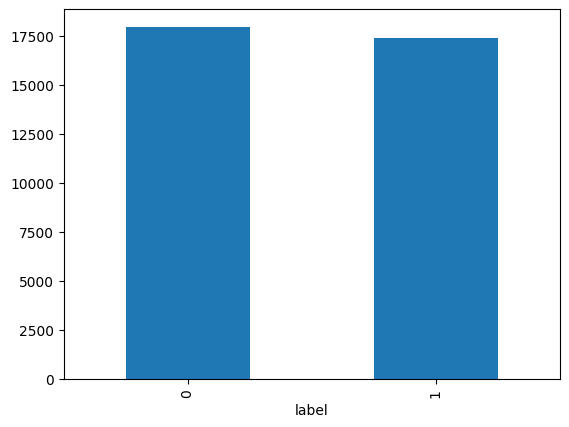

In [5]:
df_filtered.value_counts('label').plot.bar()

In [6]:
df_filtered.to_csv("news_wellness_entertainment.csv", index=False)

**Ejercicio 2**
 En base al dataset creado anteriormente Realizar una CNN para poder clasificarla de manera automatica, debe de realizarla con 3 filtros y dejar cada una de ellas como una implementacion nuevo por lo que recomiendo trabajarlo por funciones

In [ ]:
# !pip install tensorflow

In [9]:
# librerías necesarias
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [15]:
X = df_filtered["short_description"].values
y = df_filtered["label"].values

In [16]:
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp
)

In [17]:
MAX_TOKENS = 20000
SEQ_LEN = 200

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode="int",
    output_sequence_length=SEQ_LEN,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
)
vectorizer.adapt(tf.data.Dataset.from_tensor_slices(X_train).batch(256))

In [18]:
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

def make_ds(texts, labels, training=False):
    ds = tf.data.Dataset.from_tensor_slices((texts, labels))
    if training:
        ds = ds.shuffle(8192, reshuffle_each_iteration=True)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    ds = ds.map(lambda x, y: (vectorizer(x), y), num_parallel_calls=AUTOTUNE)
    return ds

train_ds = make_ds(X_train, y_train, training=True)
val_ds   = make_ds(X_val, y_val, training=False)
test_ds  = make_ds(X_test, y_test, training=False)

In [19]:
EMB_DIM = 128
FILTERS = 128
DENSE_UNITS = 128
DROPOUT = 0.4
LR = 1e-3

def build_cnn_kernel(k: int) -> tf.keras.Model:
    """CNN simple con una sola Conv1D y kernel k."""
    inputs = tf.keras.Input(shape=(SEQ_LEN,), dtype=tf.int64)
    x = tf.keras.layers.Embedding(input_dim=MAX_TOKENS, output_dim=EMB_DIM)(inputs)
    x = tf.keras.layers.Conv1D(filters=FILTERS, kernel_size=k, activation="relu")(x)
    x = tf.keras.layers.GlobalMaxPooling1D()(x)
    x = tf.keras.layers.Dense(DENSE_UNITS, activation="relu")(x)
    x = tf.keras.layers.Dropout(DROPOUT)(x)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs, outputs, name=f"cnn_k{k}")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(LR),
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")],
    )
    return model

def build_cnn_k3(): return build_cnn_kernel(3)
def build_cnn_k4(): return build_cnn_kernel(4)
def build_cnn_k5(): return build_cnn_kernel(5)

In [20]:
EPOCHS = 5
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=1, restore_best_weights=True)

def train_and_eval(build_fn, name):
    model = build_fn()
    history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=[early], verbose=1)
    # evaluación
    y_prob = model.predict(test_ds, verbose=0).ravel()
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} | Test Accuracy: {acc:.4f} | Test F1: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["WELLNESS","ENTERTAINMENT"]))
    return name, acc, f1, history

results = []
for fn, nm in [(build_cnn_k3, "CNN kernel=3"),
               (build_cnn_k4, "CNN kernel=4"),
               (build_cnn_k5, "CNN kernel=5")]:
    results.append(train_and_eval(fn, nm))

Epoch 1/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - accuracy: 0.8297 - auc: 0.9130 - loss: 0.3720 - val_accuracy: 0.9286 - val_auc: 0.9830 - val_loss: 0.1782
Epoch 2/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.9647 - auc: 0.9930 - loss: 0.0982 - val_accuracy: 0.9306 - val_auc: 0.9844 - val_loss: 0.1947

CNN kernel=3 | Test Accuracy: 0.9357 | Test F1: 0.9322

Classification Report:
               precision    recall  f1-score   support

     WELLNESS       0.91      0.97      0.94      1795
ENTERTAINMENT       0.97      0.90      0.93      1736

     accuracy                           0.94      3531
    macro avg       0.94      0.94      0.94      3531
 weighted avg       0.94      0.94      0.94      3531

Epoch 1/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 56s 121ms/step - accuracy: 0.8472 - auc: 0.9174 - loss: 0.3623 - val_accuracy: 0.9332 - val_auc: 0.9832 - val_loss: 0.1672
Epoch 2/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - accuracy: 0.9672 - auc: 0.9943 - loss: 0.0901

In [21]:
summary = pd.DataFrame([{"Modelo":n, "Accuracy":acc, "F1":f1} for (n,acc,f1,_) in results]).sort_values("F1", ascending=False)
print("\nResumen (ordenado por F1):")
print(summary.to_string(index=False))


Resumen (ordenado por F1):
      Modelo  Accuracy       F1
CNN kernel=4  0.945908 0.944103
CNN kernel=5  0.941943 0.941041
CNN kernel=3  0.935712 0.932219


**Ejercicio 3**
Debe de discutir sus resultados y realizar una comparacion de porque varia dependiendo del filtro que se use

Se entrenaron tres CNNs idénticas variando únicamente el tamaño del kernel de la capa Conv1D (k=3, 4, 5). Cada configuración procesa textos tokenizados y vectorizados con TextVectorization, aplica GlobalMaxPooling1D (detectores de patrón independientes de la posición) y una capa densa final con activación sigmoide para clasificación binaria (WELLNESS vs ENTERTAINMENT). Se utilizó early stopping sobre val_loss.

Al ver el tamaño de los kernels y la longitud típica de señales se puede concluir que en ENTERTAINMENT son frecuentes nombres propios, títulos y frases compuestas; k=4–5 capta mejor estos patrones más largos y específicos, elevando su recall respecto a k=3 (de 0.90 a 0.93–0.94).

En WELLNESS abundan expresiones breves y términos genéricos (“yoga”, “mental health”, “tips for…”); k=3 es suficiente para activarlas, logrando el recall más alto (0.97).

Algo importante de destacar es que con el Kernel más corto con k=3, los patrones son más generales aumentando el recall en WELNESS y aumenta las confusiones en ENTERTAINMENT ya que baja su recall. En cambio conforme se aumenta el kernel, los patrones son más específicos al equilibrar clases y reducir falsas activaciones.

Al pensar en el balance global y la generalización entre los modelos, el que ha sido con kernel k=4 ofrece mejor "compromiso" al ser el que tiene mejor F1.